### Imports

In [1]:
# Ajouter chemin système pour naviguer d'un dossier à l'autre facilement
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))

In [2]:
# Check version de python
!python3 --version

Python 3.11.3


In [3]:
# check compatibilité entre les versions de tensorflow et de keras:
# https://keras.io/getting_started/#tensorflow-compatibility

#To use Keras 3:

#tensorflow~=2.15.0 & keras~=3.0.0
#tensorflow~=2.16.1 & keras~=3.0.0

# PyTorch compatibility

# torch~=2.1.0 & keras~=3.0.0

# -> supprimer versions de tensorflow et keras depuis terminal (pip uninstall tensorflow, pip uninstall keras) puis refaire les installs

In [4]:
########## Imports ##########

# General Imports
import numpy as np
import pandas as pd
import os
from packages import fonctions
from pprint import pprint
import logging

# Représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# Time
from datetime import datetime
from time import time
import time

# Import the tokenizer of NLTK
# à télécharger une fois :
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

# Sklearn
from sklearn import manifold, decomposition
from sklearn import cluster, metrics
from sklearn.decomposition import PCA, NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

# pip install fasttext
from collections import defaultdict
import multiprocessing

# LDA
!pip install pyLDAvis==3.4.1
import pyLDAvis
from pyLDAvis import gensim
import gensim
import gensim.downloader as api
from gensim.corpora import Dictionary
from gensim.matutils import Sparse2Corpus
from gensim.models import Word2Vec, TfidfModel, LsiModel, LdaModel
from gensim.models.phrases import Phrases, Phraser

# Tensorflow & keras
!pip install tensorflow==2.16.1
!pip install tensorflow_hub
!pip install keras==3.0.0
!pip install torch~=2.1.0
!pip install Keras-Preprocessing
!pip install transformers

import tensorflow as tf
import tensorflow_hub as hub

from keras import backend as K
from keras import metrics as kmetrics
from keras.optimizers import Adam
from keras.layers import *
from keras.layers import Dense, Input
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Transformers
import transformers
from transformers import AutoModel, BertTokenizerFast
from transformers import BertTokenizer
#from transformers import TFBertModel # -> problème avec install de tf bert model
from transformers import AdamW
from transformers import AutoTokenizer, TFAutoModel

from absl import logging

from tqdm.notebook import tqdm
from tokenizers import BertWordPieceTokenizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 2.1.2
    Uninstalling pyLDAvis-2.1.2:
      Successfully uninstalled pyLDAvis-2.1.2

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


/opt/homebrew/lib/python3.11/site-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/opt/homebrew/lib/python3.11/site-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [5]:
########## Apparence ##########

# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

# Choix d'une palette de couleurs
sns.set_palette('Set2', color_codes = True)
print(sns.color_palette('Set2').as_hex())
sns.set_style('darkgrid')
sns.color_palette()

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [6]:
########## Import données csv ##########
# dossier data hors du dossier code pour ne pas l'importer dans github

df = pd.read_csv('../../data/df_clean.csv')
df.shape

(924, 18)

In [7]:
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications,category,category_4,sous_category,sous_ensemble
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Home and Kitchen Essential,Curtains & Accessories,Curtains
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby and Personal Care,Baby Bath & Skin,Baby
2,d4684dcdc759dd9cdf41504698d737d8,2016-06-20,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Home and Kitchen Essential,Bed Linen,Bed
3,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Home and Kitchen Essential,Bed Linen,Bed
4,f355cc1ccb08bd0d283ed979b7ee7515,2015-12-04,http://www.flipkart.com/camerii-wm64-elegance-...,"Camerii WM64 Elegance Analog Watch - For Men,...","[""Watches >> Wrist Watches >> Camerii Wrist Wa...",WATE6Y6D2MZHWGBZ,1099.0,449.0,f355cc1ccb08bd0d283ed979b7ee7515.jpg,False,"Camerii WM64 Elegance Analog Watch - For Men,...",5,5,"{""product_specification""=>[{""key""=>""Chronograp...",Wrist Watches,Electronics and Accessories,Wrist Watches,Wrist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,38782cce965307ddcdbedfcb7fa409c3,2015-12-01,http://www.flipkart.com/999store-medium-paper-...,999store Medium Paper Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2FRBYYC92E2C,999.0,599.0,38782cce965307ddcdbedfcb7fa409c3.jpg,False,Buy 999store Medium Paper Sticker for Rs.599 o...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Sales Pack...",Baby Care,Baby and Personal Care,Baby & Kids Gifts,Baby
920,be0f39341d771aac57084970f1ed6425,2015-12-01,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5UYBHF4MXU,1429.0,1143.0,be0f39341d771aac57084970f1ed6425.jpg,False,Buy Wallmantra Medium Vinyl Stickers Sticker f...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby and Personal Care,Baby & Kids Gifts,Baby
921,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,"{""product_specification""=>[{""key""=>"

In [8]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'product_specifications', 'category', 'category_4',
       'sous_category', 'sous_ensemble'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  924 non-null    object 
 1   crawl_timestamp          924 non-null    object 
 2   product_url              924 non-null    object 
 3   product_name             924 non-null    object 
 4   product_category_tree    924 non-null    object 
 5   pid                      924 non-null    object 
 6   retail_price             924 non-null    float64
 7   discounted_price         924 non-null    float64
 8   image                    924 non-null    object 
 9   is_FK_Advantage_product  924 non-null    bool   
 10  description              924 non-null    object 
 11  product_rating           924 non-null    object 
 12  overall_rating           924 non-null    object 
 13  product_specifications   924 non-null    object 
 14  category                 8

In [10]:
########## Analyse du texte ##########

# librairies
# -> NLTK
# -> Spacy

# Regex cheatsheet -> https://www.debuggex.com/cheatsheet/regex/python

# recap cours
# token, retirer stopwords, stemming/lemmatization (supprimer suffixes et préfixes)

In [11]:
# Catégories
df['category_4'].value_counts()

category_4
Baby and Personal Care          277
Electronics and Accessories     248
Home and Kitchen Essential      245
Festive and Special Occasion    120
Name: count, dtype: int64

In [12]:
# ne garder que les deux colonnes qui nous intéressent : catégorie et description

df = df[['category_4', 'description']]
df.columns = ['category', 'description']
df.shape

(924, 2)

In [13]:
df.sample(6)

,category,description
417,Electronics and Accessories,Times 284TMS284 Party-Wedding Analog Watch - ...
210,NaN,"Bergner Kadhai NA L (Aluminium, Non-stick)\r\n..."
403,Home and Kitchen Essential,"Cotonex Yellow, Green Cotton Kitchen Linen Set..."
459,Electronics and Accessories,Times 109B0109 Sports Analog Watch - For Boys...
538,Festive and Special Occasion,Key Features of SHOPOJ Blue Paper Sky Lantern ...
156,Home and Kitchen Essential,Printland PMR1834 Ceramic Mug (350 ml)\r\n ...


#### Text pre processing

In [14]:
########## TEXT PROCESSING ##########

# utiliser la description des produits car texte le plus long
# explication à développer un peu

In [15]:
def nlp_preprocessing(df, colonne, langue):

    """
    Fonction pour faire le preprocessing de la colonne d'un df
    - tokenizer
    - enlever ponctuation
    - mettre en minuscule
    - enlever stop words
    - stem
    - lemmatize

    df -> nom du dataframe sur lequel on travaille
    colonne -> nom de la colonne qu'on veut transformer (str)
    langue -> nom anglais de la langue correspondante ('french', 'spanish', 'english'...) (str)

    return -> df avec une colonne 'tokens' en plus correspondant au texte preprocessé

    """
    # tokenizer
    df['tokens'] = df[colonne].apply(word_tokenize)

    # enlever ponctuation
    df['tokens'] = df['tokens'].apply(lambda x: [item for item in x if item.isalpha()])

    # mettre en minuscule
    df['tokens'] = df['tokens'].apply(lambda x : [item.lower() for item in x])

    # enlever stop words
    stop = stopwords.words(langue)
    df['tokens'] = df['tokens'].apply(lambda x: [item for item in x if item not in stop])

    # Stem
    stemmer = PorterStemmer()
    df['stemmed'] = df['tokens'].apply(lambda x: [stemmer.stem(item) for item in x])

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    df['lemmatized'] = df['stemmed'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

    # Remove list format
    df['clean_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))

    return df

In [16]:
nlp_preprocessing(df, 'description', 'english')

,category,description,tokens,stemmed,lemmatized,clean_text
0,Home and Kitchen Essential,Key Features of Elegance Polyester Multicolor ...,"[key, features, elegance, polyester, multicolo...","[key, featur, eleg, polyest, multicolor, abstr...","[key, featur, eleg, polyest, multicolor, abstr...",key featur eleg polyest multicolor abstract ey...
1,Baby and Personal Care,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, sathiyas, cotton, bath, towel...","[specif, sathiya, cotton, bath, towel, bath, t...","[specif, sathiya, cotton, bath, towel, bath, t...",specif sathiya cotton bath towel bath towel re...
2,Home and Kitchen Essential,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, santosh, royal, fashion, cotto...","[key, featur, santosh, royal, fashion, cotton,...","[key, featur, santosh, royal, fashion, cotton,...",key featur santosh royal fashion cotton print ...
3,Home and Kitchen Essential,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, jaipur, print, cotton, floral,...","[key, featur, jaipur, print, cotton, floral, k...","[key, featur, jaipur, print, cotton, floral, k...",key featur jaipur print cotton floral king siz...
4,Electronics and Accessories,"Camerii WM64 Elegance Analog Watch - For Men,...","[camerii, elegance, analog, watch, men, boys, ...","[camerii, eleg, analog, watch, men, boy, buy, ...","[camerii, eleg, analog, watch, men, boy, buy, ...",camerii eleg analog watch men boy buy camerii ...
...,...,...,...,...,...,...
919,Baby and Personal Care,Buy 999store Medium Paper Sticker for Rs.599 o...,"[buy, medium, paper, sticker, online, medium, ...","[buy, medium, paper, sticker, onlin, medium, p...","[buy, medium, paper, sticker, onlin, medium, p...",buy medium paper sticker onlin medium paper st...
920,Baby and Personal Care,Buy Wallmantra Medium Vinyl Stickers Sticker f...,"[buy, wallmantra, medium, vinyl, stickers, sti...","[buy, wallmantra, medium, vinyl, sticker, stic...","[buy, wallmantra, medium, vinyl, sticker, stic...",buy wallmantra medium vinyl sticker sticker on...
921,Baby and Personal Care,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empow, extra, larg, self, adhes, sticke...","[oren, empow, extra, larg, self, adhes, sticke...",oren empow extra larg self adhes sticker pack ...
922,Baby and Personal Care,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[buy, wallmantra, medium, vinyl, sticker, stic...","[buy, wallmantra, medium, vinyl, sticker, stic...",buy wallmantra medium vinyl sticker sticker on...


In [17]:
# regarder fonctions de cleaning proposées en exemple
# -> fonctions séparées (une fonction par action)

# --> faire pareil ? séparer étapes en fonctions différentes ?

In [18]:
# Encoding de la target
le = LabelEncoder()
le.fit(df['category'])

df['target_encoded'] = le.transform(df['category'])
df.head()

,category,description,tokens,stemmed,lemmatized,clean_text,target_encoded
0,Home and Kitchen Essential,Key Features of Elegance Polyester Multicolor ...,"[key, features, elegance, polyester, multicolo...","[key, featur, eleg, polyest, multicolor, abstr...","[key, featur, eleg, polyest, multicolor, abstr...",key featur eleg polyest multicolor abstract ey...,3
1,Baby and Personal Care,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, sathiyas, cotton, bath, towel...","[specif, sathiya, cotton, bath, towel, bath, t...","[specif, sathiya, cotton, bath, towel, bath, t...",specif sathiya cotton bath towel bath towel re...,0
2,Home and Kitchen Essential,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, santosh, royal, fashion, cotto...","[key, featur, santosh, royal, fashion, cotton,...","[key, featur, santosh, royal, fashion, cotton,...",key featur santosh royal fashion cotton print ...,3
3,Home and Kitchen Essential,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, jaipur, print, cotton, floral,...","[key, featur, jaipur, print, cotton, floral, k...","[key, featur, jaipur, print, cotton, floral, k...",key featur jaipur print cotton floral king siz...,3
4,Electronics and Accessories,"Camerii WM64 Elegance Analog Watch - For Men,...","[camerii, elegance, analog, watch, men, boys, ...","[camerii, eleg, analog, watch, men, boy, buy, ...","[camerii, eleg, analog, watch, men, boy, buy, ...",camerii eleg analog watch men boy buy camerii ...,1


### Réduction de dimensions

In [19]:
# Maintenant que les features sont extraites -> réduction en 2 dimensions

In [20]:
df_pca = df[['target_encoded', 'clean_text']]

In [21]:
l_cat = list(set(df['category']))
print("catégories : ", l_cat)

catégories :  [nan, 'Home and Kitchen Essential', 'Festive and Special Occasion', 'Electronics and Accessories', 'Baby and Personal Care']


In [22]:
y_cat_num = [(1-l_cat.index(df.iloc[i]['category'])) for i in range(len(df))]
y_cat_num

[0,
 -3,
 0,
 0,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 0,
 0,
 0,
 -1,
 0,
 -1,
 0,
 -3,
 0,
 -3,
 -3,
 0,
 0,
 0,
 -2,
 0,
 -3,
 0,
 -2,
 1,
 -2,
 -2,
 -2,
 -3,
 -3,
 -3,
 -3,
 -3,
 -3,
 -3,
 -3,
 0,
 0,
 -3,
 0,
 0,
 0,
 0,
 0,
 0,
 -3,
 -3,
 -3,
 -3,
 -3,
 0,
 -3,
 -1,
 -1,
 -3,
 -3,
 -1,
 -1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 -3,
 -3,
 -3,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 -3,
 -1,
 -3,
 0,
 -3,
 -2,
 0,
 -3,
 -2,
 -1,
 -3,
 -3,
 -3,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 0,
 -1,
 -3,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 -3,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 

In [23]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégories et n° de clusters
# (fonctions de l'exemple du cours)

def ARI_fct(features):
    time1 = time.time()
    num_labels = len(l_cat)
    tsne = manifold.TSNE(n_components = 2, perplexity = 30, n_iter = 2000, init = 'random', learning_rate = 200, random_state = 42)
    X_tsne = tsne.fit_transform(features)

    # Détermination des clusters à partir des données après Tsne
    cls = cluster.KMeans(n_clusters = num_labels, n_init = 100, random_state = 42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_), 4)
    time2 = np.round(time.time() - time1,0)
    print('ARI : ', ARI, 'time : ', time2)

    return ARI, X_tsne, cls.labels_

# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI):
    fig = plt.figure(figsize = (15, 6))

    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y_cat_num, cmap = 'Set1')
    ax.legend(handles = scatter.legend_elements()[0], labels = l_cat, loc = 'best', title = 'Categorie')
    plt.title('Représentation des produits par catégories réelles')

    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c = labels, cmap = 'Set1')
    ax.legend(handles = scatter.legend_elements()[0], labels = set(labels), loc = 'best', title = 'Clusters')
    plt.title('Représentation des produits par clusters')

    plt.show()
    print('ARI : ', ARI)

#### Bag of Words (BOW)

In [24]:
# création du bag of words (CountVectorizer et Tf-idf)

cvect = CountVectorizer(stop_words = 'english', max_df = 0.95, min_df = 1)
ctf = TfidfVectorizer(stop_words = 'english', max_df = 0.95, min_df = 1)

feat = 'clean_text'
cv_fit = cvect.fit(df[feat])
ctf_fit = ctf.fit(df[feat])

cv_transform = cvect.transform(df[feat])
ctf_transform = ctf.transform(df[feat])

In [25]:
print('CountVectorizer : ')
print('-----------------')
ARI, X_tsne, labels = ARI_fct(cv_transform)
print('\n')
print('Tf-idf : ')
print('--------')
ARI, X_tsne, labels = ARI_fct(ctf_transform)

CountVectorizer : 
-----------------
ARI :  0.2637 time :  5.0


Tf-idf : 
--------
ARI :  0.2893 time :  4.0


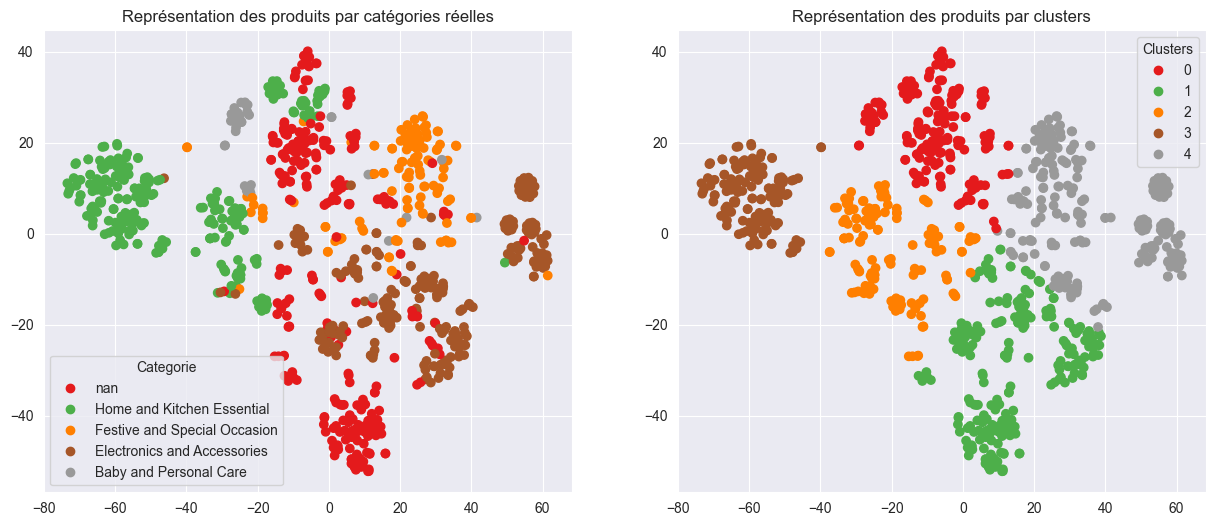

ARI :  0.2893


In [26]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [27]:
########### BOW ##########
# = Bag of words
# -> vecteur qui garde l'information de combien de fois un mot est rencontré dans un texte donné

# Compute the BOW
BOWvectorizer = CountVectorizer(stop_words = 'english')
BOW = BOWvectorizer.fit_transform(df['clean_text']).toarray()

In [28]:
BOWvectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aapno', ..., 'zone', 'zora', 'zyxel'], dtype=object)

In [29]:
# BOWvectorizer.get_feature_names() # -> ne fonctionne pas -> AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'
# -> dépend de la version de sklearn

In [30]:
BOW = pd.DataFrame(data = BOW, columns = BOWvectorizer.get_feature_names_out())
BOW

,aa,aaa,aapno,aarika,abil,abl,abod,abroad,absolut,absorb,abstract,abstrct,ac,accent,access,accessori,accid,accident,accomplish,accord,acer,ach,acid,acn,acryl,act,activ,actual,ad,adaa,adapt,adaptor,add,addict,addit,adhes,adida,adino,adjust,admir,ador,adorn,adsl,advanc,advic,advis,aero,affect,afford,afternoon,...,withstand,wo,wok,woman,wonder,wood,wooden,woodi,woodino,wool,word,work,workmanship,workstat,world,worn,worri,worshipp,woven,wow,wrap,wrapper,wring,wrinkl,wrist,write,wrought,xemex,xl,xp,yardley,yarn,ye,year,yellow,yg,yiboo,yk,york,young,youth,yuva,zaicu,zero,zikrak,zipexterior,zipper,zone,zora,zyxel
0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
921,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
922,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
BOW.shape

(924, 3275)

In [32]:
# Nombre de mots par ligne (donc pas description)
BOW.sum(axis = 1)

0      135
1       60
2      110
3      143
4       26
      ... 
919     19
920     23
921    203
922     23
923     21
Length: 924, dtype: int64

#### TF-IDF

In [33]:
########### TF-IDF ###########
# Term Frequency (TF) = nb d'occurences d'un mot dans un texte normalisé par le nb de mots dans le texte - très proche du BOW, mais ici normalisation
# Inverse Document Frequency (IDF) = inverse de la fréquence d'un terme -> va donner un poids plus important à un mot rare qu'à un mot fréquent

# TF-IDF = TF x IDF

vectorizer = TfidfVectorizer(stop_words = 'english')
tf_idf = vectorizer.fit_transform(df['clean_text']).toarray()
tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
#df_tfidf = pd.DataFrame(data = tf_idf, columns = vectorizer.get_feature_names())
df_tfidf = pd.DataFrame(data = tf_idf, columns = vectorizer.get_feature_names_out()) # attention, encore une fois, dépend de la version de sklearn utilisée
df_tfidf

,aa,aaa,aapno,aarika,abil,abl,abod,abroad,absolut,absorb,abstract,abstrct,ac,accent,access,accessori,accid,accident,accomplish,accord,acer,ach,acid,acn,acryl,act,activ,actual,ad,adaa,adapt,adaptor,add,addict,addit,adhes,adida,adino,adjust,admir,ador,adorn,adsl,advanc,advic,advis,aero,affect,afford,afternoon,...,withstand,wo,wok,woman,wonder,wood,wooden,woodi,woodino,wool,word,work,workmanship,workstat,world,worn,worri,worshipp,woven,wow,wrap,wrapper,wring,wrinkl,wrist,write,wrought,xemex,xl,xp,yardley,yarn,ye,year,yellow,yg,yiboo,yk,york,young,youth,yuva,zaicu,zero,zikrak,zipexterior,zipper,zone,zora,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.06781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070058,0.0,0.179178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044524,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036577,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,

In [35]:
df_tfidf.shape

(924, 3275)

In [36]:
########## Similarité ##########
# similarité entre deux textes

# cosine similarity = produit scalaire entre deux vecteurs
pairwise.cosine_similarity(tf_idf)

array([[1.        , 0.04849699, 0.07199688, ..., 0.01075068, 0.00105043,
        0.00122433],
       [0.04849699, 1.        , 0.13469008, ..., 0.00447678, 0.        ,
        0.        ],
       [0.07199688, 0.13469008, 1.        , ..., 0.00916327, 0.        ,
        0.        ],
       ...,
       [0.01075068, 0.00447678, 0.00916327, ..., 1.        , 0.15649002,
        0.10910363],
       [0.00105043, 0.        , 0.        , ..., 0.15649002, 1.        ,
        0.49667493],
       [0.00122433, 0.        , 0.        , ..., 0.10910363, 0.49667493,
        1.        ]])

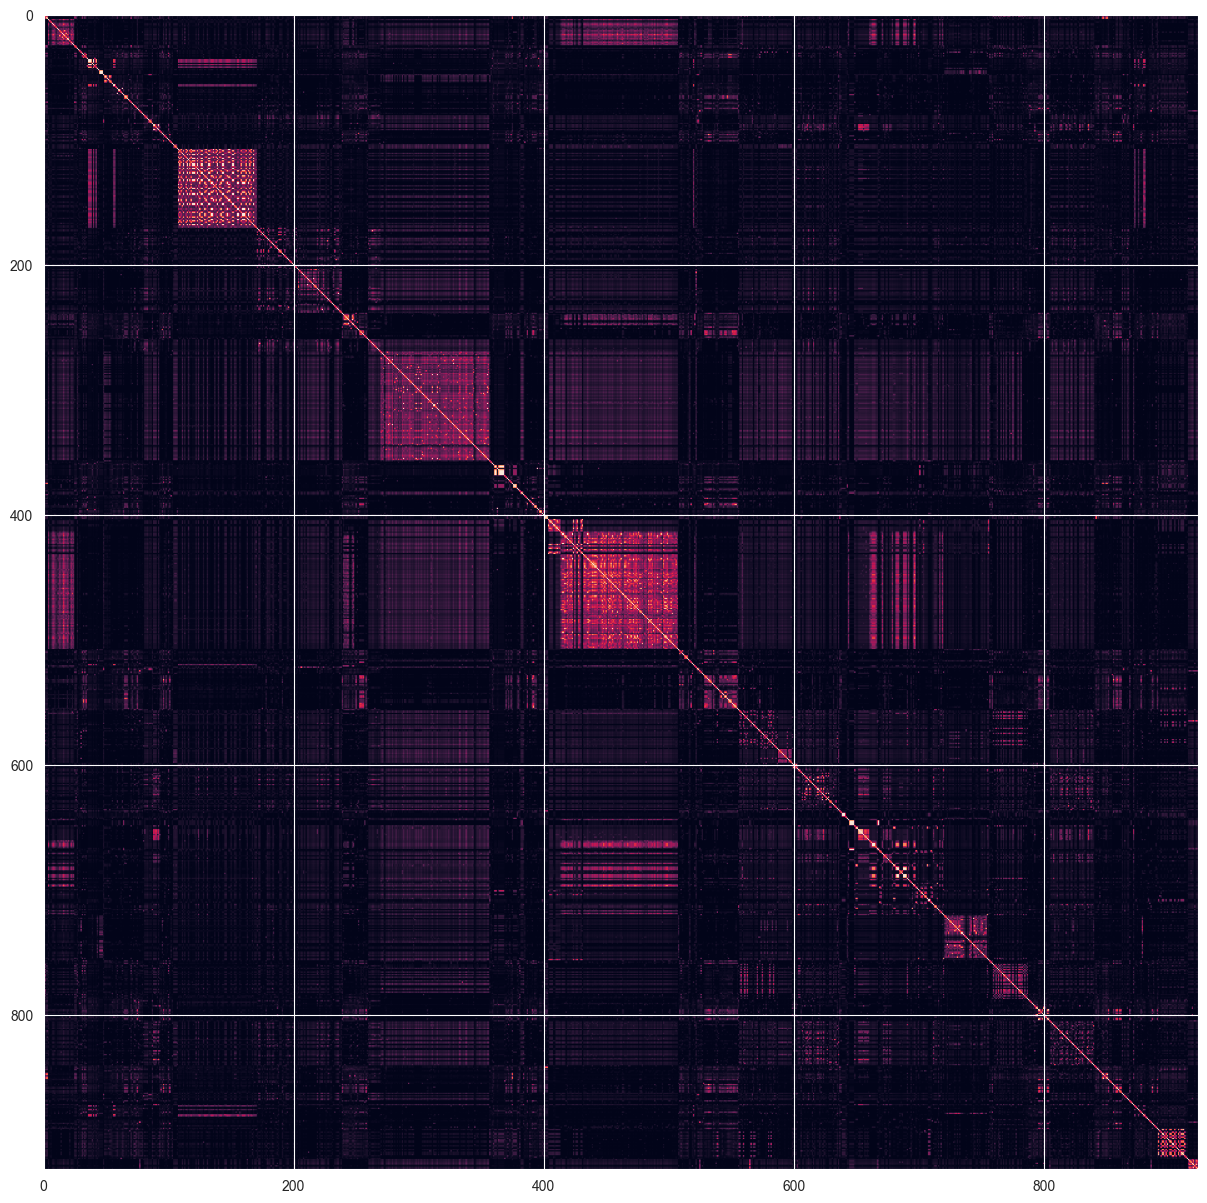

In [37]:
plt.figure(figsize = (15, 15))
plt.imshow(pairwise.cosine_similarity(tf_idf))
plt.show()

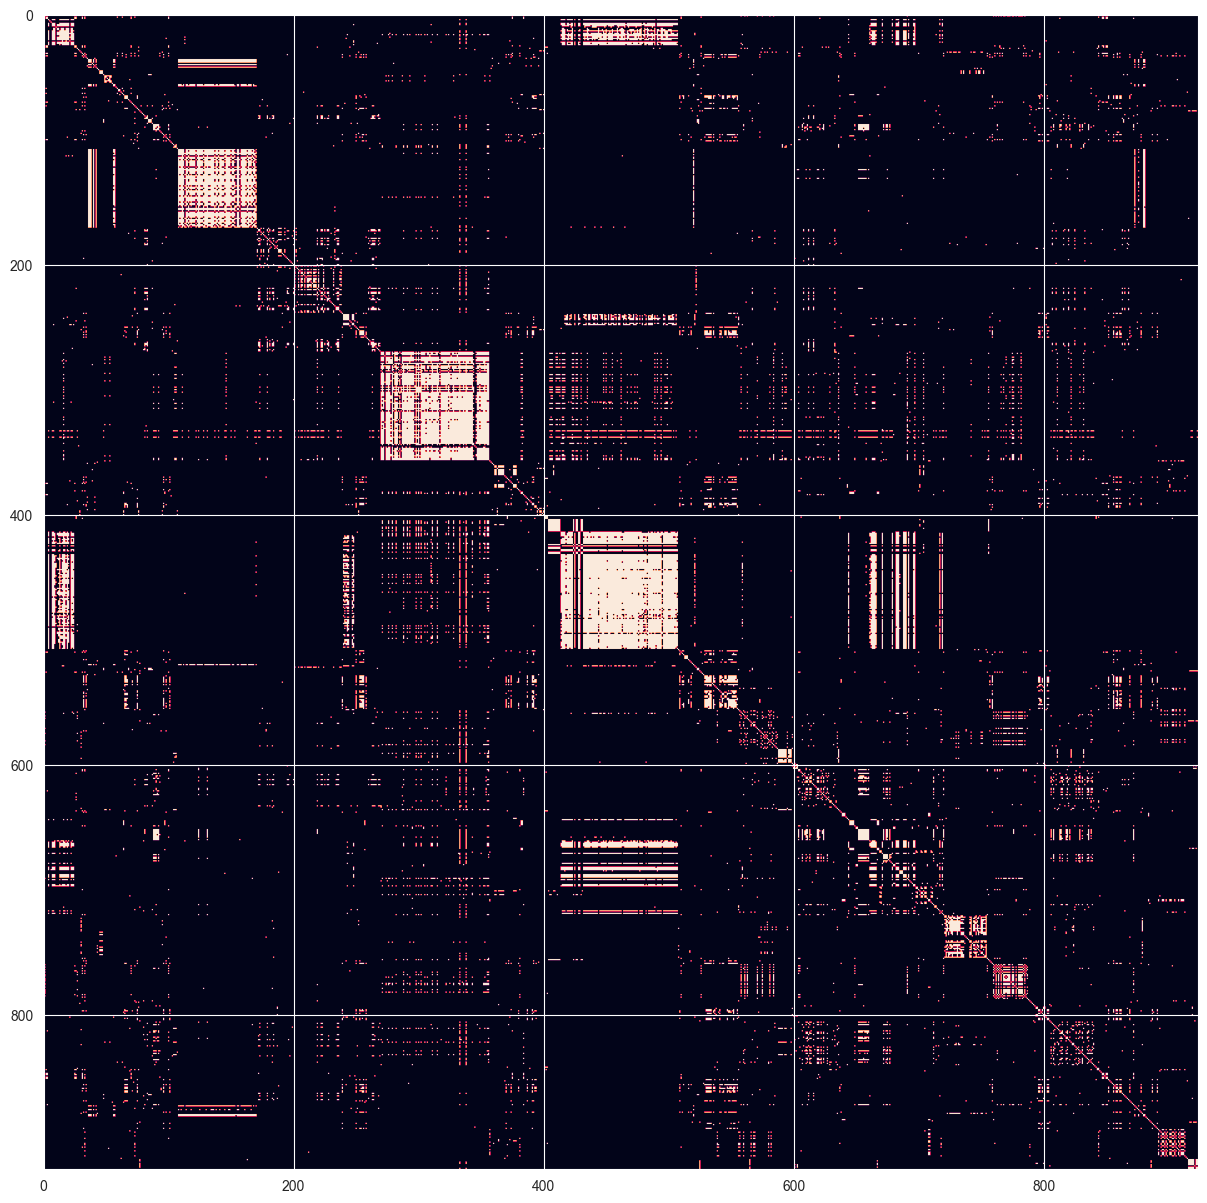

In [38]:
# définir un seuil de similarité ?

plt.figure(figsize = (15, 15))
plt.imshow(pairwise.cosine_similarity(tf_idf) > 0.2)
plt.show()


### Word embedding

In [39]:
########## Word embedding #########

# représentation matricielle, chaque mot à un nb donné de features
# idée de relation entre les mots
# but = pouvoir prédire le mot suivant dans une phrase

# GloVe, Word2Vec...

# A Word Embedding is a matrix representation, meaning each word has a given number of features. You can see the words as vectors and the features as their coordinates.
# There are many different Word Embeddings

#### GloVe

In [40]:
########## GloVe ##########
# = Global Vector
# unsupervised learning algorithm for obtaining vector representations for words

# made by Stanford NLP group -> https://nlp.stanford.edu/projects/glove/
# light word embedding, but still powerful
# several models exit, to encode words into vectors of 50, 100, 200 or even 300 dimensions


In [41]:
texts = df['clean_text']
target = df['target_encoded']

In [42]:
# Calculate the length of our vocabulary

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

3373

In [43]:
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('../../data/models/glove.6B/glove.6B.100d.txt') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype = 'float32')
        embeddings_dictionary [word] = vector_dimensions

# embeddings_dictionary

In [44]:
# Now we will load embedding vectors of those words that appear in the Glove dictionary. Others will be initialized to 0.

embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12804   ,  0.34130999,  0.33105999, ..., -0.37728   ,
         1.28989995,  0.13223   ],
       [ 0.16057   ,  0.1303    ,  0.07715   , ...,  0.021896  ,
         0.67049003,  0.03047   ],
       ...,
       [-0.18802001,  0.96000999,  0.66961002, ...,  0.081625  ,
         0.01086   ,  0.55449998],
       [-0.25308001, -0.82011002, -0.39436999, ..., -0.042999  ,
        -0.38387999,  0.69467002],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [45]:
print(embedding_matrix.shape)
pca = decomposition.PCA(n_components = 0.99)
feat_pca = pca.fit_transform(embedding_matrix)
print(feat_pca.shape)

(3373, 100)
(3373, 94)


temps de T-SNE :            15.64 secondes


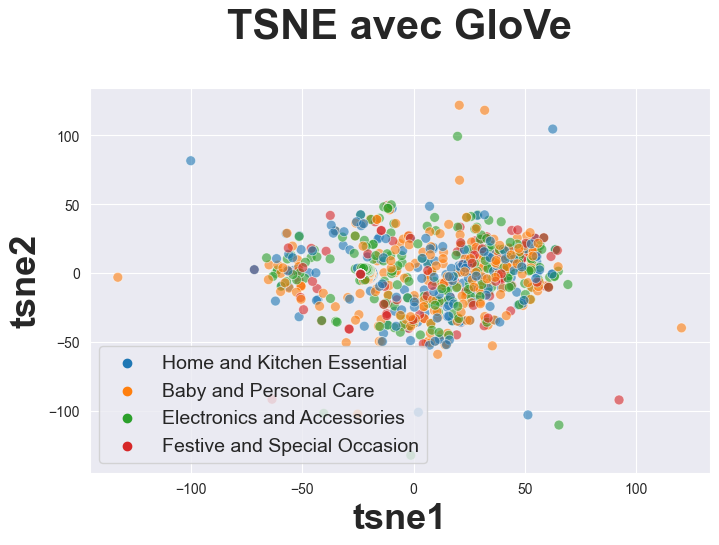

In [46]:
temps1 = time.time()

tsne = manifold.TSNE(n_components = 2, perplexity = 30, n_iter = 2000, init = 'random', random_state = 6)
X_tsne = tsne.fit_transform(feat_pca)

duration1 = time.time() - temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

df_tsne = pd.DataFrame(X_tsne, columns = ['tsne1', 'tsne2'])
df_tsne["class"] = df["category"]

plt.figure(figsize = (8,5))
sns.scatterplot(
    x = "tsne1", y = "tsne2",
    hue = "class",
    palette = sns.color_palette('tab10', n_colors = 4), s = 50, alpha = 0.6,
    data = df_tsne,
    legend = "brief")

plt.title('TSNE avec GloVe', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop = {'size': 14}) 

plt.show()

In [47]:
# nuuuuul

#### Word2Vec

In [48]:
########## Word2Vec ##########
# -> le word embedding le plus utilisé à l'heure actuelle - puissant et versatile

# pretrained model by Google
# https://code.google.com/archive/p/word2vec/
# This model is particularly complex, thus the pretrained model is saved in a very large file (about 4 GB)

# Load Google's pre-trained Word2Vec model, give the right path to the downloaded file
model = gensim.models.KeyedVectors.load_word2vec_format('../../data/models/GoogleNews-vectors-negative300.bin', binary = True)
model

In [49]:
df['clean_text'][0]

'key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain cm height pack price r curtain enhanc look curtain made high qualiti polyest featur eyelet style stitch metal make room environ romant curtain wrinkl anti shrinkag eleg home bright modernist appeal design surreal attent sure steal heart contemporari eyelet valanc curtain slide smoothli draw apart first thing morn welcom bright sun ray want wish good morn whole world draw close even creat special moment joyou beauti given sooth print bring home eleg curtain softli filter light room get right amount specif eleg polyest multicolor abstract eyelet door curtain cm height pack gener brand eleg design door type eyelet model name abstract polyest door curtain set model id color multicolor dimens length cm box number content sale packag pack sale packag curtain bodi design materi polyest'

In [50]:
# tutoriel sur kaggle -> https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial
# A REVOIR


sent = [row.split() for row in df['clean_text']]
phrases = Phrases(sent, min_count = 30, progress_per = 10000)

In [51]:
# Bigrammes = n-gram de rang 2
# bigram = sequence of two adjacent elements from a string of tokens

bigram = Phraser(phrases)
bigram

In [53]:
sentences = bigram[sent]
sentences

In [54]:
sentences[0]

['key_featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'cm',
 'height',
 'pack',
 'price_r',
 'curtain',
 'enhanc',
 'look',
 'curtain',
 'made',
 'high_qualiti',
 'polyest',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'make',
 'room',
 'environ',
 'romant',
 'curtain',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'home',
 'bright',
 'modernist',
 'appeal',
 'design',
 'surreal',
 'attent',
 'sure',
 'steal',
 'heart',
 'contemporari',
 'eyelet',
 'valanc',
 'curtain',
 'slide',
 'smoothli',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'close',
 'even',
 'creat',
 'special',
 'moment',
 'joyou',
 'beauti',
 'given',
 'sooth',
 'print',
 'bring',
 'home',
 'eleg',
 'curtain',
 'softli',
 'filter',
 'light',
 'room',
 'get',
 'righ

In [55]:
# Most frequent words
# -> calculer fréquence de chaque mot

word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

3432

In [56]:
word_freq

defaultdict(int,
            {'key_featur': 183,
             'eleg': 56,
             'polyest': 63,
             'multicolor': 150,
             'abstract': 45,
             'eyelet': 43,
             'door': 36,
             'curtain': 50,
             'floral': 55,
             'cm': 330,
             'height': 96,
             'pack': 266,
             'price_r': 310,
             'enhanc': 17,
             'look': 98,
             'made': 168,
             'high_qualiti': 62,
             'featur': 116,
             'style': 49,
             'stitch': 7,
             'metal': 31,
             'make': 101,
             'room': 53,
             'environ': 3,
             'romant': 1,
             'wrinkl': 3,
             'anti': 6,
             'shrinkag': 1,
             'home': 151,
             'bright': 17,
             'modernist': 1,
             'appeal': 13,
             'design': 322,
             'surreal': 1,
             'attent': 4,
             'sure': 38,
          

In [57]:
# trier les mots par fréquence pour obtenir les 10 mots les plus fréquents
sorted(word_freq, key = word_freq.get, reverse = True)[:10]

['buy',
 'free_ship',
 'cash_deliveri',
 'specif',
 'product',
 'cm',
 'design',
 'color',
 'price_r',
 'day_replac']

In [58]:
cores = multiprocessing.cpu_count()

In [59]:
w2v_model = Word2Vec(
    min_count = 20,
    window = 2,
    sample = 6e-5,
    alpha = 0.03,
    min_alpha = 0.0007,
    negative = 20,
    workers = cores-1
    )

# to do -> explorer les paramètres

In [60]:
w2v_model.build_vocab(sentences, progress_per = 10000)

In [61]:
w2v_model.train(sentences, total_examples = w2v_model.corpus_count, epochs = 30, report_delay = 1)

(163718, 1220370)

In [62]:
w2v_model.init_sims(replace = True)

In [63]:
w2v_model.wv.most_similar(positive = ['color'])

[('featur', 0.9939111471176147),
 ('addit', 0.9932762384414673),
 ('content_sale', 0.9931974411010742),
 ('box_number', 0.9923822283744812),
 ('type', 0.9921587109565735),
 ('machin', 0.9915620684623718),
 ('cotton', 0.9906846284866333),
 ('packag_pack', 0.9905534982681274),
 ('flat', 0.9898256063461304),
 ('pack', 0.9897802472114563)]

In [64]:
w2v_model.wv.most_similar(positive = ['buy'])

[('sonata', 0.995201826095581),
 ('buckl', 0.9948016405105591),
 ('maximum', 0.9943734407424927),
 ('round', 0.9933457970619202),
 ('clasp', 0.9928994178771973),
 ('water_resist', 0.9923612475395203),
 ('case', 0.9913656711578369),
 ('watch', 0.9896778464317322),
 ('woman', 0.9882506728172302),
 ('strap', 0.9874874949455261)]

In [65]:
w2v_model.wv.most_similar(positive = ['watch'])

[('case', 0.9956372976303101),
 ('sonata', 0.9934337139129639),
 ('buckl', 0.9932465553283691),
 ('watch_men', 0.9932043552398682),
 ('digit', 0.9925211668014526),
 ('gold', 0.992428183555603),
 ('round', 0.9914914965629578),
 ('buy', 0.9896777272224426),
 ('maximum', 0.9881686568260193),
 ('clasp', 0.9859161972999573)]

In [66]:
w2v_model.wv.similarity('buy', 'watch')

0.98967767

In [67]:
w2v_model.wv.doesnt_match(['buy', 'color', 'carpet'])

'buy'

In [68]:
w2v_model.wv.doesnt_match(['watch', 'bracelet', 'carpet'])

'watch'

In [69]:
w2v_size = 300
w2v_window = 5
w2v_min_count = 1
w2v_epochs = 100
maxlen = 24 # adapt to length of sentences
sentences = df['clean_text'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [70]:
# Création et entraînement du modèle Word2Vec

print('Build & train Word2Vec model ...')
w2v_model = gensim.models.Word2Vec(
    min_count = w2v_min_count,
    window = w2v_window,
    vector_size = w2v_size,
    seed = 42,
    workers = 1,
    #workers = multiprocessing.cpu_count()
    )
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples = w2v_model.corpus_count, epochs = w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print('Vocabulary size: %i' % len(w2v_words))
print('Word2Vec trained')

Build & train Word2Vec model ...
Vocabulary size: 3353
Word2Vec trained


In [71]:
# Préparation des sentences (tokenization)

print('Fit Tokenizer ...')
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences), maxlen=maxlen, padding = 'post')

num_words = len(tokenizer.word_index) + 1
print('Number of unique words: %i' % num_words)

Fit Tokenizer ...
Number of unique words: 3354


In [72]:
# Création de la matrice d'embedding

print('Create Embedding matrix ...')
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i = 0
j = 0

for word, idx in word_index.items():
    i += 1
    if word in w2v_words:
        j += 1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (3354, 300)


In [73]:
# Création du modèle

input = Input(shape = (len(x_sentences), maxlen), dtype = 'float64')
word_input = Input(shape = (maxlen, ), dtype = 'float64')

In [74]:
word_embedding = Embedding(
    input_dim = vocab_size,
    output_dim = w2v_size,
    weights = [embedding_matrix],
    input_length = maxlen
    )(word_input)

ValueError: Unrecognized keyword arguments passed to Embedding: {'weights': [array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.31361985,  0.79326487, -0.62538487, ...,  0.50204891,
        -0.49769688, -1.23243415],
       [-0.397641  ,  0.62920743,  0.14274435, ...,  0.79367399,
        -0.69199091, -1.203089  ],
       ...,
       [-0.15304627, -0.13401295, -0.09248154, ..., -0.03147877,
        -0.26851559,  0.04921638],
       [-0.07079452, -0.06114796, -0.00633447, ..., -0.01415854,
        -0.03351859,  0.02856968],
       [-0.0854149 , -0.13074084,  0.00401868, ..., -0.01204507,
        -0.05348147,  0.03507001]])], 'input_length': 24}

In [ ]:
word_vec = GlobalAveragePooling1D()(word_embedding)
embed_model = Model([word_input], word_vec)
embed_model.summary()

NameError: name 'word_vec' is not defined

In [ ]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

In [ ]:
ARI, X_tsne, labels = ARI_fct(embeddings)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

#### FastText

In [ ]:
########## FastText ##########

# developed by Facebook AI Research lab
# probably the most efficient Word Embedding
# does not only use words, but all possible n-grams (at character level) of any word to compute its embedding
# far more complex and heavy to use than the other models
# https://fasttext.cc/#

In [ ]:
# non testé ici

#### Latent Dirichlet Allocation (LDA)

In [75]:
########## LDA ########### 

# Le modèle Latent Dirichlet Allocation suppose que chaque document est un mélange d’un petit nombre de topics, et que chaque occurrence d’un mot correspond à l’un des sujets du document. 
# En réalité, chaque mot se voit attribuer un topic selon la loi de Dirichlet. On obtient donc un premier topic model. Pour générer le suivant, on prend chaque mot et on met à jour le topic auquel il est associé. 
# Ce nouveau thème est celui qui aurait la plus forte probabilité de le générer dans ce document.
# Le Latent Dirichlet Allocation n’est pas un algorithme à itération unique. A la première itération, l’algorithme attribue au hasard des mots aux topics. 
# Il passe ensuite en revue chaque mot de chaque document et applique des formules de calcul de probabilité.
# Le processus est ensuite répété à travers diverses itérations jusqu’à ce que l’algorithme génère un ensemble de topics et qu’on obtiennent un modèle satisfaisant.

In [76]:
# https://larevueia.fr/latent-dirichlet-allocation-topic-modeling-en-python/
# cours vivadata:


In [77]:
# Create a corpus
corpus = df['tokens']

# Compute the dictionary: this is a dictionary mapping words and their corresponding numbers for later visualisation
id2word = Dictionary(corpus)

# Create a BOW
bow = [id2word.doc2bow(line) for line in corpus]  # convert corpus to BoW format

# Instanciate a TF-IDF
tfidf_model = TfidfModel(bow)

# Compute the TF-IDF
tf_idf_gensim = tfidf_model[bow]

In [78]:
# Compute the LDA
lda1 = LdaModel(corpus = tf_idf_gensim, num_topics = 5, id2word = id2word, passes = 10, random_state = 0)

# Print the main topics
pprint(lda1.print_topics())

[(0,
  '0.004*"tenda" + 0.004*"guarantee" + 0.004*"replacement" + 0.004*"kadhai" + '
  '0.004*"day" + 0.003*"genuine" + 0.003*"cash" + 0.003*"shipping" + '
  '0.003*"delivery" + 0.003*"products"'),
 (1,
  '0.006*"towel" + 0.005*"bath" + 0.005*"cm" + 0.004*"cotton" + '
  '0.004*"polyester" + 0.004*"blanket" + 0.004*"eyelet" + 0.004*"double" + '
  '0.004*"curtain" + 0.003*"door"'),
 (2,
  '0.004*"rockmantra" + 0.004*"warranty" + 0.004*"timewel" + 0.004*"men" + '
  '0.004*"laptop" + 0.003*"skin" + 0.003*"perucci" + 0.003*"mug" + '
  '0.003*"ceramic" + 0.003*"product"'),
 (3,
  '0.015*"watch" + 0.013*"analog" + 0.009*"women" + 0.008*"discounts" + '
  '0.008*"sonata" + 0.008*"men" + 0.007*"india" + 0.007*"online" + '
  '0.007*"guarantee" + 0.007*"great"'),
 (4,
  '0.007*"baby" + 0.007*"mug" + 0.005*"girl" + 0.004*"details" + '
  '0.004*"fabric" + 0.004*"ceramic" + 0.004*"cotton" + 0.004*"boy" + '
  '0.004*"dress" + 0.004*"usb"')]


In [79]:
# Instantiate the TF-IDF vectorizer
vectorizer = TfidfVectorizer(lowercase = False, analyzer = lambda x: x)

# Compute the TF-IDF
tf_idf = vectorizer.fit_transform(df['tokens'])
pd.DataFrame(data = tf_idf.toarray(), columns = vectorizer.get_feature_names_out(), index = corpus.index).head()


,aa,aaa,aapno,aarika,abilities,ability,able,abode,abroad,absolute,absorbency,absorbent,absorber,absorbing,absorbs,abstract,abstracts,abstrcts,ac,accent,access,accessories,accessory,accident,accidental,accomplishes,according,acer,aches,aching,acid,acne,across,acrylic,act,active,acts,actual,adaa,adapter,adapters,adaptor,add,added,addiction,adding,addition,additional,additionally,adds,...,wool,word,work,working,workmanship,works,workstation,world,worn,worries,worry,worshippers,would,woven,wow,wrap,wrapped,wrapper,wring,wrinkle,wrist,write,wrought,x,xemex,xl,xp,yardley,yarn,year,years,yellow,yes,yet,ygs,yiboo,yk,york,young,youth,youthful,yuva,zaicus,zero,zikrak,zipexterior,zipper,zone,zora,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.175537,0.068634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
# Dictionary mapping from word IDs to words, initialized in a lazy manner to save memory (not created until needed)
dictionary = Dictionary(df['tokens'])
print(dictionary)

Dictionary<4225 unique tokens: ['abstract', 'amount', 'anti', 'apart', 'appeal']...>


In [81]:
# Convert the TF-IDF to the needed input for Gensim
tf_idf_sklearn = Sparse2Corpus(tf_idf, documents_columns = False)

In [82]:
# Compute the LDA
lda2 = LdaModel(corpus = tf_idf_sklearn, id2word = id2word, num_topics = 5, passes = 10, random_state = 42)

# Print the main topics
pprint(lda2.print_topics())

[(0,
  '0.005*"extraction" + 0.004*"rainy" + 0.004*"introduces" + 0.004*"sauce" + '
  '0.003*"exporters" + 0.003*"signature" + 0.003*"ability" + 0.003*"christ" + '
  '0.003*"therapeutic" + 0.003*"balm"'),
 (1,
  '0.005*"baking" + 0.005*"marble" + 0.005*"grapefruit" + 0.005*"induction" + '
  '0.005*"little" + 0.005*"christ" + 0.005*"therapeutic" + 0.005*"balm" + '
  '0.005*"introduces" + 0.004*"adapter"'),
 (2,
  '0.006*"improper" + 0.005*"smelled" + 0.004*"luxurious" + 0.004*"pindia" + '
  '0.004*"jersey" + 0.004*"lithium" + 0.004*"precious" + 0.004*"little" + '
  '0.004*"matte" + 0.003*"marble"'),
 (3,
  '0.006*"marble" + 0.006*"baking" + 0.006*"grapefruit" + 0.006*"induction" + '
  '0.006*"christ" + 0.006*"therapeutic" + 0.006*"little" + 0.006*"exporters" + '
  '0.005*"balm" + 0.005*"pindia"'),
 (4,
  '0.019*"trusted" + 0.016*"pillow" + 0.010*"vivify" + 0.010*"precious" + '
  '0.010*"grapefruit" + 0.010*"marble" + 0.010*"baking" + 0.010*"induction" + '
  '0.009*"pindia" + 0.009*"litt

In [83]:
# LDA visualization

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model = lda1, corpus = bow, dictionary = id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.070560  0.048856       1        1  38.198051
2     -0.010987 -0.055561       2        1  20.149618
3      0.072312  0.040128       3        1  19.894581
1     -0.015737 -0.018910       4        1  14.340195
0      0.024972 -0.014514       5        1   7.417555, topic_info=           Term        Freq       Total Category  logprob  loglift
184       watch  192.000000  192.000000  Default  30.0000  30.0000
168      analog  178.000000  178.000000  Default  29.0000  29.0000
2516     sonata   77.000000   77.000000  Default  28.0000  28.0000
114       women  110.000000  110.000000  Default  27.0000  27.0000
174   discounts   96.000000   96.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
180      online    8.922042  123.570003   Topic5  -5.9639  -0.0270
999     sticker    6.242647   34.585293   Topic5  -6.3210   0.8893
955   showpiece    7.315925   82.284422   Topic5  -6.1624   0.1812
357        best    7.182722   83.316223   Topic5  -6.1808   0.1504
13           cm    6.131111  125.998109   Topic5  -6.3391  -0.4216

[280 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.678416  abstract
0         2  0.028869  abstract
0         3  0.014434  abstract
0         4  0.259819  abstract
0         5  0.014434  abstract
...     ...       ...       ...
1328      1  0.128761       yet
1328      2  0.804755       yet
1328      3  0.032190       yet
1328      4  0.032190       yet
1328      5  0.032190       yet

[1070 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 2, 1])

#### BERT

In [86]:
########## BERT ###########

# Liens ressources Openclassrooms :
# https://huggingface.co/docs/transformers/index
# https://github.com/google-research/bert
# https://lesdieuxducode.com/blog/2019/4/bert--le-transformer-model-qui-sentraine-et-qui-represente
# https://huggingface.co/docs/transformers/model_doc/bert#transformers.TFBertModel
# https://www.kaggle.com/models/tensorflow/bert/frameworks/tensorFlow2/variations/en-uncased-l-12-h-768-a-12/versions/4?tfhub-redirect=true

# tutoriel
# https://www.kaggle.com/code/harshjain123/bert-for-everyone-tutorial-implementation

#### specify GPU
# cuda = parallel computing platform by NVIDIA, for efficient GPU acceleration
# si mal installé -> erreurs ensuite
device = torch.device("cuda")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(torch.cuda.is_available())
print(torch.cuda.device_count())

False
0


In [87]:
df

,category,description,tokens,stemmed,lemmatized,clean_text,target_encoded
0,Home and Kitchen Essential,Key Features of Elegance Polyester Multicolor ...,"[key, features, elegance, polyester, multicolo...","[key, featur, eleg, polyest, multicolor, abstr...","[key, featur, eleg, polyest, multicolor, abstr...",key featur eleg polyest multicolor abstract ey...,3
1,Baby and Personal Care,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, sathiyas, cotton, bath, towel...","[specif, sathiya, cotton, bath, towel, bath, t...","[specif, sathiya, cotton, bath, towel, bath, t...",specif sathiya cotton bath towel bath towel re...,0
2,Home and Kitchen Essential,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, santosh, royal, fashion, cotto...","[key, featur, santosh, royal, fashion, cotton,...","[key, featur, santosh, royal, fashion, cotton,...",key featur santosh royal fashion cotton print ...,3
3,Home and Kitchen Essential,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, jaipur, print, cotton, floral,...","[key, featur, jaipur, print, cotton, floral, k...","[key, featur, jaipur, print, cotton, floral, k...",key featur jaipur print cotton floral king siz...,3
4,Electronics and Accessories,"Camerii WM64 Elegance Analog Watch - For Men,...","[camerii, elegance, analog, watch, men, boys, ...","[camerii, eleg, analog, watch, men, boy, buy, ...","[camerii, eleg, analog, watch, men, boy, buy, ...",camerii eleg analog watch men boy buy camerii ...,1
...,...,...,...,...,...,...,...
919,Baby and Personal Care,Buy 999store Medium Paper Sticker for Rs.599 o...,"[buy, medium, paper, sticker, online, medium, ...","[buy, medium, paper, sticker, onlin, medium, p...","[buy, medium, paper, sticker, onlin, medium, p...",buy medium paper sticker onlin medium paper st...,0
920,Baby and Personal Care,Buy Wallmantra Medium Vinyl Stickers Sticker f...,"[buy, wallmantra, medium, vinyl, stickers, sti...","[buy, wallmantra, medium, vinyl, sticker, stic...","[buy, wallmantra, medium, vinyl, sticker, stic...",buy wallmantra medium vinyl sticker sticker on...,0
921,Baby and Personal Care,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empow, extra, larg, self, adhes, sticke...","[oren, empow, extra, larg, self, adhes, sticke...",oren empow extra larg self adhes sticker pack ...,0
922,Baby and Personal Care,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[buy, wallmantra, medium, vinyl, sticker, stic...","[buy, wallmantra, medium, vinyl, sticker, stic...",buy wallmantra medium vinyl sticker sticker on...,0


In [88]:
df.columns

Index(['category', 'description', 'tokens', 'stemmed', 'lemmatized',
       'clean_text', 'target_encoded'],
      dtype='object')

In [89]:
# split train dataset into train, validation and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(df['clean_text'], df['target_encoded'], random_state = 2018, test_size = 0.3)

In [90]:
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, random_state = 2018, test_size = 0.5)

In [91]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<Axes: >

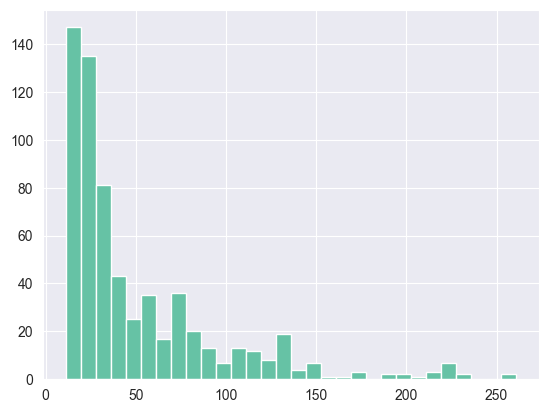

In [92]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [93]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)

except:
    strategy = tf.distribute.get_strategy()

print('Number of replicas in sync: ', strategy.num_replicas_in_sync)

Number of replicas in sync:  1


In [94]:
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')

def bert_encode(data, maximum_length) :
    input_ids = []
    attention_masks = []

    for text in data:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens = True,
            max_length = maximum_length,
            pad_to_max_length = True,

            return_attention_mask = True,
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
        
    return np.array(input_ids), np.array(attention_masks)

In [95]:
texts = df['clean_text']
target = df['target_encoded']

train_input_ids, train_attention_masks = bert_encode(texts, 60)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [96]:


def create_model(bert_model):
    
    input_ids = tf.keras.Input(shape = (60,), dtype = 'int32')
    attention_masks = tf.keras.Input(shape = (60,), dtype = 'int32')

    output = bert_model([input_ids, attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(32, activation = 'relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(1,activation = 'sigmoid')(output)
    
    model = tf.keras.models.Model(inputs = [input_ids, attention_masks], outputs = output)
    model.compile(Adam(lr = 1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [99]:
!pip install --upgrade transformers
from transformers import BertTokenizer, TFBertModel, BertModel

model = BertModel.from_pretrained('bert-base-uncased')

tokenizer = BertTokenizer.from_pretrained(model)
model = TFBertModel.from_pretrained(model)
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='tf')
resp = model(encoded_input)
print(resp)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 8.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.4/346.4 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.4/393.4 kB 6.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 10.3 MB/s eta 0:00:0000:010:01m
  Attempting uninstall: safetensors
    Found existing installation: safetensors 0.3.1
    Uninstalling safetensors-0.3.1:
      Successfully uninstalled safetensors-0.3.1
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.15.1
    Uninstalling huggingface-hub-0.15.1:
      Successfully uninstalled huggingface-hub-0.15.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: transformers
   

RuntimeError: Failed to import transformers.models.bert.modeling_tf_bert because of the following error (look up to see its traceback):
cannot import name 'convert_batch_encoding' from 'transformers.tf_utils' (/opt/homebrew/lib/python3.11/site-packages/transformers/tf_utils.py)

In [ ]:
bert_model = transformers.TFBertModel.from_pretrained('bert-base-uncased')

RuntimeError: Failed to import transformers.models.bert.modeling_tf_bert because of the following error (look up to see its traceback):
No module named 'keras.__internal__'

In [100]:
# load model téléchargé en local
PATH = '../../data/models/BLABLABLLA' # mettre le bon nom
tokenizer = BertTokenizer.from_pretrained(PATH, local_files_only = True)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [ ]:
model = create_model(bert_model)
model.summary()

In [ ]:
history = model.fit(
    [train_input_ids, train_attention_masks],
    target,
    validation_split = 0.2,
    epochs = 3,
    batch_size = 10
)

In [ ]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize = (20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]], fontsize = 18)
        ax[idx].set_xlabel('A',fontsize = 16)
        ax[idx].set_ylabel('B',fontsize = 16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1], fontsize = 16)

In [ ]:
plot_learning_curves(history, [['loss', 'val_loss'], ['accuracy', 'val_accuracy']])

In [ ]:
# faire predict

In [ ]:
print(embedding_matrix.shape)
pca = decomposition.PCA(n_components = 0.99)
feat_pca = pca.fit_transform(embedding_matrix)
print(feat_pca.shape)

temps1 = time.time()

tsne = manifold.TSNE(n_components = 2, perplexity = 30, n_iter = 2000, init = 'random', random_state = 6)
X_tsne = tsne.fit_transform(feat_pca)

duration1 = time.time() - temps1
print('temps de T-SNE : ', '%15.2f' % duration1, 'secondes')

df_tsne = pd.DataFrame(X_tsne, columns = ['tsne1', 'tsne2'])
df_tsne['class'] = df['category']

plt.figure(figsize = (8,5))
sns.scatterplot(
    x = 'tsne1',
    y = 'tsne2',
    hue = 'class',
    palette = sns.color_palette('tab10', n_colors = 4),
    s = 50,
    alpha = 0.6,
    data = df_tsne,
    legend = 'brief'
    )

plt.title('TSNE avec GloVe', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop = {'size': 14}) 

plt.show()

In [ ]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 25,
    pad_to_max_length = True,
    truncation = True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 25,
    pad_to_max_length = True,
    truncation = True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 25,
    pad_to_max_length = True,
    truncation = True
)

In [ ]:
## convert lists to tensors

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [ ]:
# https://stackoverflow.com/questions/65804689/with-bert-text-classification-valueerror-too-many-dimensions-str-error-occur
# The issue is you are passing a list of strings (str) in torch.tensor() , it only accepts the list of numerical values (integer, float etc.)
# -> solution : convertir les labels en int (dictionnaire)

df['category'].unique()

In [ ]:
# split train dataset into train, validation and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(df['clean_text'], df['target_encoded'], random_state = 2018, test_size = 0.3)
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, random_state = 2018, test_size = 0.5)

In [ ]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 25,
    pad_to_max_length = True,
    truncation = True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 25,
    pad_to_max_length = True,
    truncation = True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 25,
    pad_to_max_length = True,
    truncation = True
)

In [ ]:
## convert lists to tensors

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [ ]:
#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler = train_sampler, batch_size = batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size = batch_size)

In [ ]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        
        self.bert = bert 
        
        # dropout layer
        self.dropout = nn.Dropout(0.1)
      
        # relu activation function
        self.relu =  nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 512)
      
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 2)

        #softmax activation function
        self.softmax = nn.LogSoftmax(dim = 1)

    #define the forward pass
    def forward(self, sent_id, mask):
        
        #pass the inputs to the model  
        _, cls_hs = self.bert(sent_id, attention_mask = mask, return_dict = False)
      
        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)
      
        # apply softmax activation
        x = self.softmax(x)

        return x

In [ ]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [ ]:
# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-5)

In [ ]:
#compute the class weights
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(train_labels), y = train_labels)
print("Class Weights:", class_weights)

In [ ]:
df['target_encoded'].unique()

In [ ]:
class_weights = compute_class_weight(class_weight = 'balanced', classes = df['target_encoded'].unique(), y = train_labels)
print("Class Weights:", class_weights)

In [ ]:
# Vérifier que les catégories sont bien représentées dans le train et le test

plt.figure(1, figsize = (20, 7))
# Barplot

product_categories_train = data_train['label'].value_counts()
product_categories_test = data_test['label'].value_counts()

plt.subplot(121)
sns.barplot(x = product_categories_train.index, y = product_categories_train.values)
plt.title('Product categories - train')
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()

plt.subplot(122)
sns.barplot(x = product_categories_test.index, y = product_categories_test.values)
plt.title('Product categories - test')
plt.xticks(rotation = 45)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()

plt.tight_layout()
plt.show()

In [ ]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights, dtype = torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight = weights) 

# number of training epochs
epochs = 10

In [ ]:
# function to train the model
def train():
    
    model.train()
    total_loss, total_accuracy = 0, 0
  
    # empty list to save model predictions
    total_preds = []
  
    # iterate over batches
    for step,batch in enumerate(train_dataloader):
        
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
        
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
 
        sent_id, mask, labels = batch
        
        # clear previously calculated gradients 
        model.zero_grad()

        # get model predictions for the current batch
        preds = model(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds = preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
  
      # predictions are in the form of (no. of batches, size of batch, no. of classes).
      # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis = 0)

    #returns the loss and predictions
    return avg_loss, total_preds

In [ ]:
# function for evaluating the model
def evaluate():
    
    print("\nEvaluating...")
  
    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0
    
    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step, batch in enumerate(val_dataloader):
        
        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():
            
            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds, labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader) 

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [ ]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses = []
valid_losses = []

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

In [ ]:
# get predictions for test data
with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()

In [ ]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

In [ ]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length):
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding = 'max_length',
                                              return_attention_mask = True,
                                              return_token_type_ids = True,
                                              truncation = True,
                                              return_tensors = 'tf')

        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0],
                             bert_inp['token_type_ids'][0],
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)

    return input_ids, token_type_ids, attention_mask, bert_inp_tot


# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode = 'HF'):
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size):
        idx = step * batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], bert_tokenizer, max_length)
        if mode == 'HF':    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode == 'TFhub': # Bert Tensorflow Hub
            text_preprocessed = {'input_word_ids' : input_ids,
                                 'input_mask' : attention_mask,
                                 'input_type_ids' : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']

        if step == 0:
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else:
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))

    features_bert = np.array(last_hidden_states_tot).mean(axis=1)

    time2 = np.round(time.time() - time1,0)
    print('temps traitement : ', time2)
    
    return features_bert, last_hidden_states_tot

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df['clean_text'].to_list()

In [ ]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, max_length, batch_size, mode = 'HF')

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_bert)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

#### Universal Sentence Encoder (USE)

In [ ]:
########## USE (Universal Sentence Encoder) ##########

# https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder?hl=fr


#module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
module_path = '../../data/models/universal_sentence_encoder/saved_model.pb'
model = hub.load(module_path)
print ("module %s loaded" % module_path)
def embed(input):
  return model(input)

In [ ]:
# Universal Sentence Encoder encodes entire sentence or text into vectors of real numbers that can be used for clustering, sentence similarity, text classification, 
# and other Natural language processing (NLP) tasks.
# The pre-trained model is trained on greater than word length text, sentences, phrases, paragraphs, etc using a deep averaging network (DAN) encoder.

# word embedding -> represent word into vectors
# sentence embedding -> entire sentence or text along with semantics information is mapped into vectors of real numbers

In [ ]:
# test avec les exemples donnés

word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

In [ ]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

In [ ]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)

In [ ]:
run_and_plot(df['clean_text'])

In [ ]:
# test avec mon jeu de données
# https://www.geeksforgeeks.org/word-embedding-using-universal-sentence-encoder-in-python/

sentences = df['clean_text']

embeddings = embed(sentences)

# Printing embeddings of each sentence
print(embeddings) 
  
# To print each embeddings along with its corresponding sentence below code can be used.
for i in range(len(sentences)): 
    print(sentences[i]) 
    print(embeddings[i])

In [ ]:
#Explanation:
#The above output represents input sentences into their corresponding vectors using the Universal Sentence encoder.

In [ ]:
os.environ["TF_KERAS"] = '1'

In [ ]:
# modele 4 -> marche pas
#embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/3")
embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2")

In [ ]:
# si ne fonctionne pas comme ça, télécharger le modèle et le charger en local

In [ ]:
def feature_USE_fct(sentences, b_size):
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences) // batch_size):
        idx = step * batch_size
        feat = embed(sentences[idx : idx + batch_size])

        if step == 0:
            features = feat
        else :
            features = np.concatenate((features, feat))

    time2 = np.round(time.time() - time1, 0)
    return features

In [ ]:
batch_size = 10
sentences = df['clean_text'].to_list()

In [ ]:
features_USE = feature_USE_fct(sentences, batch_size)

In [ ]:
ARI, X_tsne, labels = ARI_fct(features_USE)

In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### Comparaison

In [ ]:
# A faire -> comparer la performance des différentes approches (avec/sans bow/tfidf, avec/sans word embedding et comparer les 3 word embedding differents)

# stocker ari score dans une variable

In [ ]:
########## CONCLUSION ##########

# -> à dire en ouverture
# analyse de texte basée sur description des produits semble pertinente car blablabla
# cependant, repose sur description -> il faut donc avec une description relativement pertinente du produit déjà disponible pour pouvoir le classifier automatiquement - pas super pratique